In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image1 = cv2.imread("sunflower.png",0)
image2 = cv2.imread("classroom.jpg",0)


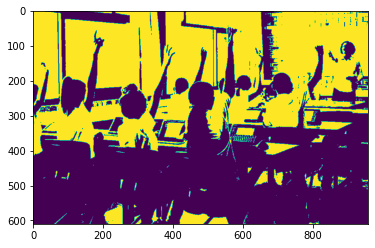

In [46]:
image2 = cv2.imread("classroom.jpg", cv2.IMREAD_GRAYSCALE)
thresh = 127
im_bw = cv2.threshold(image2, thresh, 255, cv2.THRESH_BINARY)[1]
#cv2.imwrite('blackwhite.png', im_bw)


plt.imshow(im_bw)

In [ ]:



obj_detector = cv2.SimpleBlobDetector_create()

keypoints = obj_detector.detect(image1)

blank_img = np.zeros((1,1))
blobs = cv2.drawKeypoints(image1, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow("Display Blobs", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
len(keypoints)

75

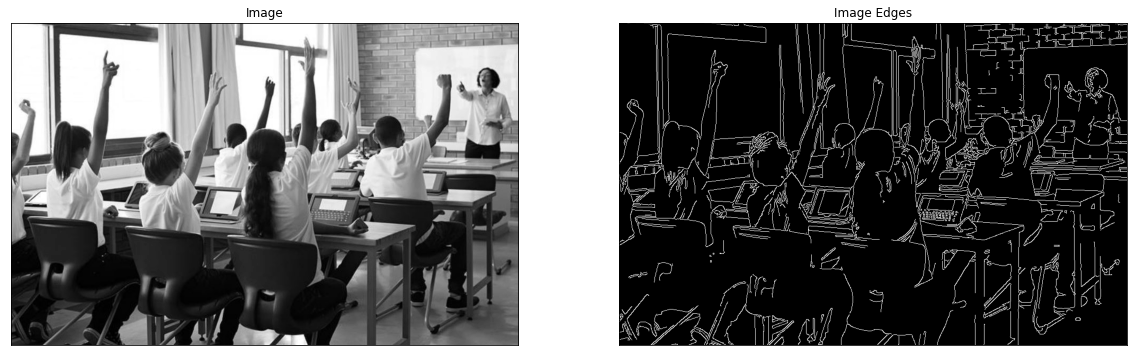

In [3]:

canny = cv2.Canny(image2, 100, 200)

titles = ['Image','Image Edges']
images = [image2, canny]
plt.figure(figsize=(20,10))

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()


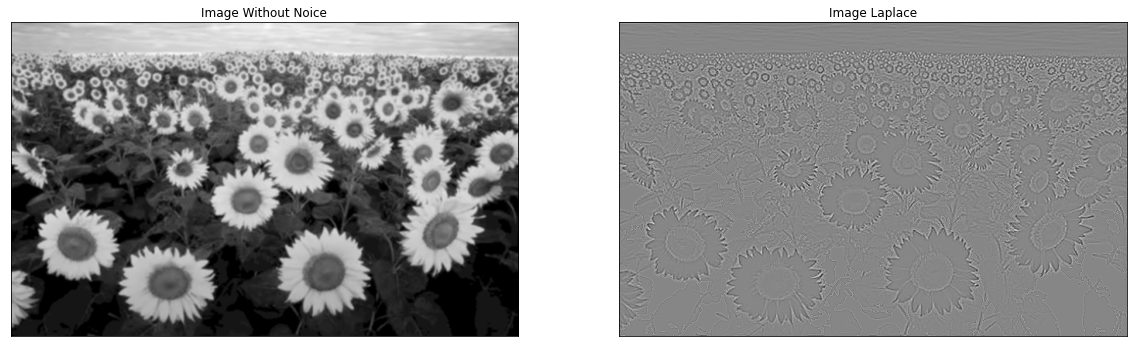

In [4]:

# converting to gray scale
#image_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# remove noise
image_wn = cv2.GaussianBlur(image1,(3,3),0)

image_lap = cv2.Laplacian(image1,cv2.CV_64F)

titles = ['Image Without Noice','Image Laplace']
images = [image_wn, image_lap]
plt.figure(figsize=(20,10))

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()


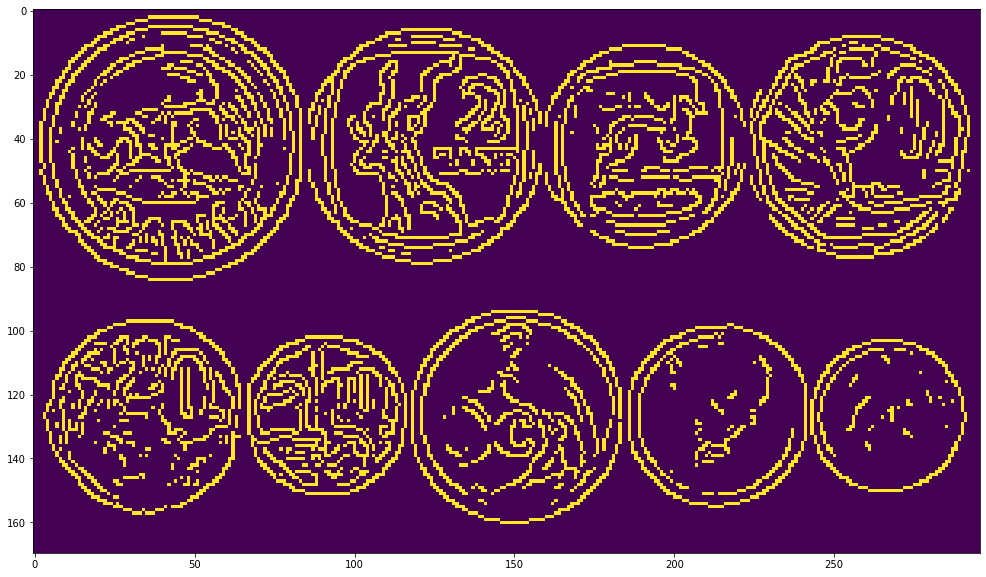

In [68]:
#Contour Detection

import numpy as np

image3 = cv2.imread("Bhindi.jpg",0)
image4 = cv2.imread("coins.png",0)

imageblur = cv2.GaussianBlur(image4, (3,3), 1)
#imggray = cv2.cvtColor(imageblur, cv2.COLOR_BGR2GRAY)

canny_img = cv2.Canny(imageblur, 140,140)

plt.figure(figsize=(20,10))
plt.imshow(canny_img)
#imgblur = img

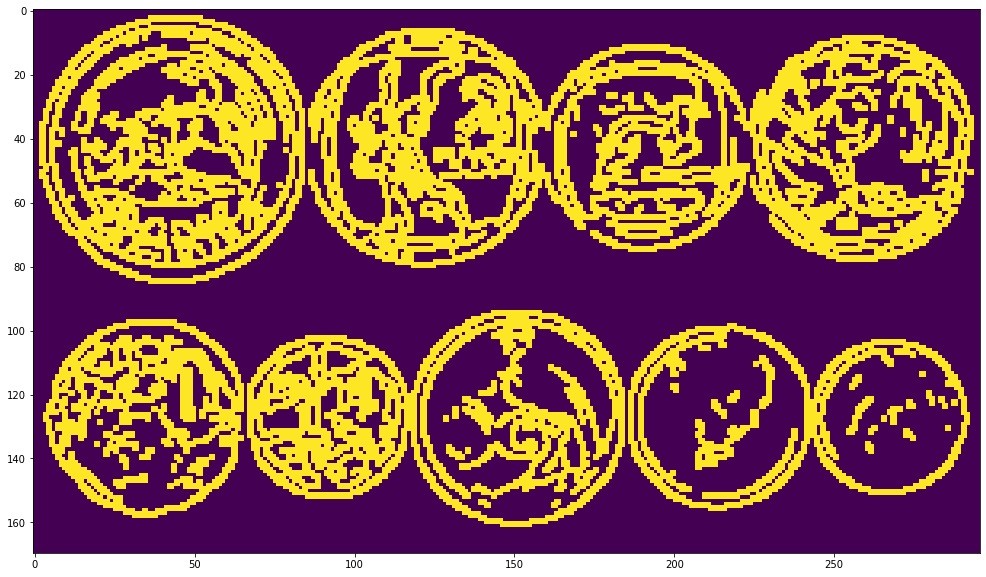

In [79]:
kernel = np.ones((2,2))
imgdil = cv2.dilate(canny_img, kernel, iterations = 1)
plt.figure(figsize=(20,10))

"""# Perform morphology
se = np.ones((2,2), dtype='uint8')
imgclose = cv2.morphologyEx(imgdil, cv2.MORPH_CLOSE, se)
"""
plt.imshow(imgdil)
#plt.imshow(imgclose)

13
8
13
10
8


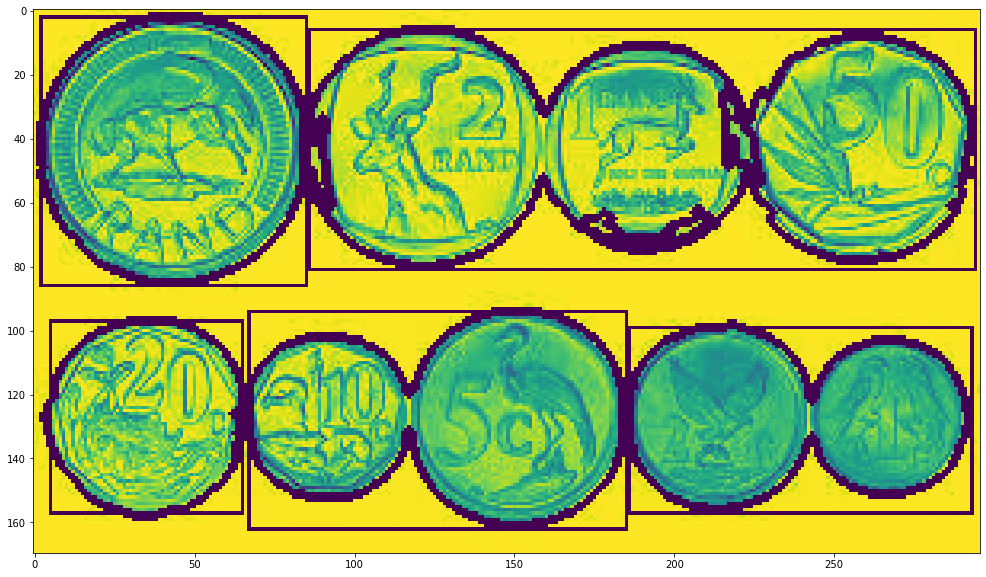

In [80]:
"""def get_countours(img,imgContour):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(imgContour, contours, -1, (255,255,0), 3)
"""
imageContour = image4.copy()

def get_countours(img,imgContour):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:
            cv2.drawContours(imgContour, cnt, -1, (0,0,255), 2)
            perimeter = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt, 0.02*perimeter, True)
            print(len(approx))
            x_, y_, w, h = cv2.boundingRect(approx)
            cv2.rectangle(imgContour, (x_,y_), (x_ + w,y_ + h), (0,255,0), 1)



get_countours(imgdil,imageContour)

plt.figure(figsize=(20,10)) 
plt.imshow(imageContour)
